# Twitter Sentiment Analysis Stock Price Prediction

### - Crawl data

### - Sentiment Analysis

### - Predict Stock

## Import module

In [1]:
from textblob import TextBlob
import tweepy as tw
import json
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

## Set up token API

In [2]:
api_key = "HAcIeikl6eRheQP1oKYGDwPx0"
api_secret = "gEWmqG7QVXzudnviUXDo98L2UKGYg9PNqy1bAR1geClkHjqBGk"
access_token = "1481095074465579008-1pApYlU4HRJWpbAXcbdVEVGzdACuEz"
access_token_secret = "htgD81H4mOxXw5MglAljFRHhcfGAuwsNomXVqvGw0Obwe"
auth = tw.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth,wait_on_rate_limit=True)

## Crawl data

In [3]:
number_of_tweets = 1000
tweets = []
user_id =[]
created_at = []
key_word = 'Amazon Finance'
keyword_list = ['News', 'Finance', 'Customers', 'Employees', 'Company', 'Price', 'Shareholders', 'Market', 'Soaring', 'Trends', 'Decline']
company = 'Amazon'
for i in tw.Cursor(api.search, q= key_word , lang ="en", since = "2022-01-14",tweet_mode = "extended").items(number_of_tweets):
  tweets.append(i.full_text)
  user_id.append(i.user.id)
  created_at.append(i.created_at)

## Dataframe

In [4]:
df = pd.DataFrame({"Created_at": created_at,"User_id": user_id,"Tweets":tweets})
df

,Created_at,User_id,Tweets
0,2022-01-30 08:24:56,1127209745301921793,"Back in Stock : 4 Pieces Door Curtain Set, 7 f..."
1,2022-01-30 08:23:50,738752276836306944,#Gaming Xbox series X stock - live: Latest UK ...
2,2022-01-30 08:21:21,1377519267143376898,PowerColor Red Devil AMD Radeon™ RX 6900 XT Ga...
3,2022-01-30 08:20:05,1432973493520375815,@borntolovelwt Amazon doesn’t stock up on them :(
4,2022-01-30 08:19:11,1377519267143376898,Xbox Series S is now in stock. \nATC: https://...
...,...,...,...
995,2022-01-29 18:21:13,2436115542,"@NachoSoto @joshdholtz @Javi Huh, it’s in stoc..."
996,2022-01-29 18:21:08,25626210,@shreknotbigfoot @ProcopioVera @scottbudman Sp...
997,2022-01-29 18:18:16,1315379833644306432,ASUS RADEON RX 6600 XT TUF OC in stock at reta...
998,2022-01-29 18:18:03,499672969,(US)In Stock: AORUS RX 6700 XT Elite WINDFORCE...


## Clean data

In [5]:
# df = df[~df.tweets.str.contains("RT")]
# df = df.reset_index(drop = True)
# df

In [6]:
def cleanUpTweet(txt):
    txt = re.sub(r'@[A-Za-z0-9_]+','',txt) # Remove mentions @
    txt = re.sub(r'#', '', txt) # Remove hastag symbol
    txt = re.sub(r'RT[\s]+', '', txt) # Remove RT
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt) # Remove hyper link
    txt = re.sub('[^A-Za-z0-9]+', ' ', txt) # Remove special characters
    return txt

In [7]:
df['Tweets'] = df['Tweets'].apply(cleanUpTweet)
df

,Created_at,User_id,Tweets
0,2022-01-30 08:24:56,1127209745301921793,Back in Stock 4 Pieces Door Curtain Set 7 feet...
1,2022-01-30 08:23:50,738752276836306944,Gaming Xbox series X stock live Latest UK rest...
2,2022-01-30 08:21:21,1377519267143376898,PowerColor Red Devil AMD Radeon RX 6900 XT Gam...
3,2022-01-30 08:20:05,1432973493520375815,Amazon doesn t stock up on them
4,2022-01-30 08:19:11,1377519267143376898,Xbox Series S is now in stock ATC Affiliate Li...
...,...,...,...
995,2022-01-29 18:21:13,2436115542,Huh it s in stock right now too
996,2022-01-29 18:21:08,25626210,Spotify stock is considered to be a mid small...
997,2022-01-29 18:18:16,1315379833644306432,ASUS RADEON RX 6600 XT TUF OC in stock at reta...
998,2022-01-29 18:18:03,499672969,US In Stock AORUS RX 6700 XT Elite WINDFORCE ...


## Subjectivity and polarity

In [8]:
# Create function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [9]:
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)
df

,Created_at,User_id,Tweets,Subjectivity,Polarity
0,2022-01-30 08:24:56,1127209745301921793,Back in Stock 4 Pieces Door Curtain Set 7 feet...,0.255385,0.070000
1,2022-01-30 08:23:50,738752276836306944,Gaming Xbox series X stock live Latest UK rest...,0.470833,0.056061
2,2022-01-30 08:21:21,1377519267143376898,PowerColor Red Devil AMD Radeon RX 6900 XT Gam...,0.000000,0.000000
3,2022-01-30 08:20:05,1432973493520375815,Amazon doesn t stock up on them,0.000000,0.000000
4,2022-01-30 08:19:11,1377519267143376898,Xbox Series S is now in stock ATC Affiliate Li...,0.000000,0.000000
...,...,...,...,...,...
995,2022-01-29 18:21:13,2436115542,Huh it s in stock right now too,0.535714,0.285714
996,2022-01-29 18:21:08,25626210,Spotify stock is considered to be a mid small...,0.405115,0.069224
997,2022-01-29 18:18:16,1315379833644306432,ASUS RADEON RX 6600 XT TUF OC in stock at reta...,0.000000,0.000000
998,2022-01-29 18:18:03,499672969,US In Stock AORUS RX 6700 XT Elite WINDFORCE ...,0.000000,0.000000


## WordCloud Visualization

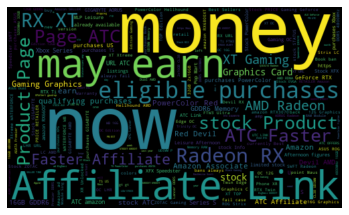

In [10]:
# Plot the word cloud 
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()
